In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df_house_data=pd.read_csv('E:\Personal\DataScience\MachineLearning\Bengaluru_House_Data.csv')

We will be doing a house price prediction project and will see all the steps in end to end process
1. Importing the data
2. Data Cleaning

## Data Cleaning
First we will be seeing the shape of the dataset and then will analyse the independent and target variable

In [4]:
df_house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df_house_data.shape

(13320, 9)

1. First observation --> Target variable --> price
2. We will see the correlation matrix for this dataset and will find out which are highly correlated with the target variable

In [5]:
df_house_data.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


As we can see corr works with only numerical data. Hence we will apply other data cleaning concepts.
3. Check if any columns can be dropped from the dataset
   We are assuming that the below variables are not having much impact on the house price.
   1. Area_type
   2. Availability
   3. Society
   4. balcony

In [7]:
df_house_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df_cl_house_data=df_house_data.drop(columns=['area_type','availability','society', 'balcony'],axis=1)

In [9]:
df_cl_house_data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Once the dataset is cleaned, move to the next step.
4. Check the NaN values or treat NaN values

In [10]:
df_cl_house_data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df_cl_house_data.shape

(13320, 5)

As we can see that the null values are very less as compared to the size of the dataset hence we will delete those null value rows.

In [12]:
df_cl_house_data.dropna(axis=0,inplace=True)

In [13]:
df_cl_house_data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Great ! now we don't have any null values in our dataset. Now we will move to the next step:
5. Check the type of data in the dataset

In [14]:
df_cl_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
location      13246 non-null object
size          13246 non-null object
total_sqft    13246 non-null object
bath          13246 non-null float64
price         13246 non-null float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


bath and price is already in the float64 dtype but other variables are as object. So let's find out about the data in those columns

In [15]:
df_cl_house_data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


location variable contains string so we will handle this avariable a bit later. First lets shift our focus on size and total_sqft variable as it is a mix of numbers and string.

In [16]:
df_cl_house_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df_cl_house_data.groupby('size').size().sort_values()

size
27 BHK           1
19 BHK           1
18 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
43 Bedroom       1
11 BHK           2
10 BHK           2
11 Bedroom       2
8 BHK            5
9 BHK            8
10 Bedroom      12
1 RK            13
7 BHK           17
6 BHK           30
9 Bedroom       46
5 BHK           57
7 Bedroom       83
8 Bedroom       84
1 Bedroom      105
6 Bedroom      191
5 Bedroom      296
2 Bedroom      329
1 BHK          531
3 Bedroom      546
4 BHK          577
4 Bedroom      818
3 BHK         4286
2 BHK         5198
dtype: int64

As we can see there 1RK has count 13. So this can be handled in the following ways:
a. Assign some other value to this category
b. Remove this data from the dataset
c. Consider this as 1BHK(For simplicity of the model and project)

In [18]:
df_cl_house_data['bhk']=df_cl_house_data['size'].apply(lambda x: x.split(' ')[0])

In the above command we are splitting the data on the basis of spaces and taking only the first element of the result.

In [19]:
df_cl_house_data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


Great! we have handled the size variable. Now we can remove it from the dataset. Also we will look on the categories of total_sqft

In [20]:
df_cl_house_data.drop('size',axis=1,inplace=True)

the error is comming in the above command because, we have run it second time and the column was already deleted from the dataset.

In [21]:
df_cl_house_data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [22]:
df_cl_house_data['total_sqft'].value_counts()

1200           843
1100           221
1500           204
2400           195
600            180
1000           172
1350           132
1050           123
1300           117
1250           114
900            112
1400           108
1800           104
1150           101
1600           100
1140            91
2000            82
1450            70
1650            69
800             67
1075            66
3000            66
1020            63
2500            62
1160            60
1125            60
1550            60
950             59
1180            58
1700            58
              ... 
961              1
1264             1
5422             1
772              1
1160 - 1315      1
941              1
1660 - 1805      1
3860             1
2274.24          1
873              1
1139.7           1
1378             1
2155             1
2970             1
1383             1
52272            1
2601             1
3560             1
2928             1
3230             1
2005             1
3692        

In [23]:
df_cl_house_data.groupby('total_sqft').size()

total_sqft
1                      1
1.25Acres              1
1.26Acres              1
1000                 172
1000 - 1285            1
10000                  4
1000Sq. Meter          1
1001                   2
1002                   2
1003                   2
10030                  1
1004                   1
1004 - 1204            1
1005                  13
1005.03 - 1252.49      1
1006                   3
1007                  12
1008                   4
1009                   5
1010                  24
1010 - 1300            1
1011                   3
1012                  18
1013                   2
1014                   1
1015                  21
1015 - 1540            1
1016                   6
1017                   3
1018                   3
                    ... 
967                    4
970                   13
971                    2
972                    4
973                    2
975                   18
976                    1
977                    1
978           

if the dtype of an element is not float we will be taking the average of the range.

In [24]:
def checkdtype(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df_copy=df_cl_house_data.copy()

In [27]:
df_copy[~df_copy['total_sqft'].apply(checkdtype)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [ ]:
df1.shape

In [28]:
def convert(x):
    res = x.split('-')
    if len(res)==2:
        avg = (float(res[0])+float(res[1]))/2
        return avg    
    try:
        return (float(x))
    except:
        return None

In [39]:
convert('14284')

14284.0

In [29]:
df_cl_house_data['total_sqft']=df_cl_house_data['total_sqft'].apply(convert)

In [30]:
df_cl_house_data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [31]:
df_cl_house_data[~df_cl_house_data['total_sqft'].apply(checkdtype)]

,location,total_sqft,bath,price,bhk


We can see in the above output that the method/function has been applied successfully and size variable has been converted into the float.

In [32]:
total_sqft_null=pd.isnull(df_cl_house_data['total_sqft'])

In [33]:
type(total_sqft_null)

pandas.core.series.Series

In [35]:
df_copy[total_sqft_null].shape

(46, 5)

In [38]:
df_total_sqft_null=df_copy[total_sqft_null]

In [39]:
df_total_sqft_null

,location,total_sqft,bath,price,bhk
410,Kengeri,34.46Sq. Meter,1.0,18.50,1
648,Arekere,4125Perch,9.0,265.00,9
775,Basavanagara,1000Sq. Meter,2.0,93.00,1
872,Singapura Village,1100Sq. Yards,2.0,45.00,2
1019,Marathi Layout,5.31Acres,1.0,110.00,1
1086,Narasapura,30Acres,2.0,29.50,2
1400,Chamrajpet,716Sq. Meter,9.0,296.00,9
1712,Singena Agrahara,1500Sq. Meter,3.0,95.00,3
1743,Hosa Road,142.61Sq. Meter,3.0,115.00,3
1821,Sarjapur,1574Sq. Yards,3.0,76.00,3


In [40]:
df_cl_house_data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


Now only location variable is left for analysis. It is a categorical variable. We will follow the below steps:
a. Check the count for each category
b. Check if One Hot Encoding or label encoding can be applied
c. try to reduce the categories by applying some threshold values or making cateogry as other

In [41]:
df_cl_house_data.groupby('location').size().sort_values(ascending=False)

location
Whitefield                                      534
Sarjapur  Road                                  392
Electronic City                                 302
Kanakpura Road                                  266
Thanisandra                                     233
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
KR Puram                                         88
Hoo

In the above output we can see that there are many categories having count only 1. Let's find out how many such categories are there 

In [42]:
df_cl_house_data=df_copy.copy()

In [43]:
df=df_cl_house_data.groupby('location').size().sort_values(ascending=False)

In [44]:
df

location
Whitefield                                      534
Sarjapur  Road                                  392
Electronic City                                 302
Kanakpura Road                                  266
Thanisandra                                     233
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
KR Puram                                         88
Hoo

Here we are taking all the categories which are having less than 10. Our main is that we will mention those categories as others. As we can see below, there are 1063 rows so we can implement this concept.

In [45]:
df=df[df<10]

In [46]:
len(df)

1051

In [47]:
type(df)

pandas.core.series.Series

In [48]:
df_cl_house_data['location']=df_cl_house_data['location'].apply(lambda x : 'other' if x in df else x)

In [49]:
df_cl_house_data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [50]:
df_cl_house_data.groupby('location').size()

location
 Devarachikkanahalli           14
1st Block Jayanagar            14
1st Block Koramangala          10
1st Phase JP Nagar             25
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           24
5th Block Hbr Layout           12
5th Phase JP Nagar             39
6th Phase JP Nagar             23
7th Phase JP Nagar            149
8th Phase JP Nagar             57
9th Phase JP Nagar             43
AECS Layout                    12
Abbigere                       24
Akshaya Nagar                  62
Ambalipura                     27
Ambedkar Nagar                 31
Amruthahalli                   24
Anandapura                     27
Ananth Nagar                   30
Anekal                         35
Anjanapura                     16
Ardendale                      24
Arekere                        17
Attibele                       42
BEML Layout                    13
BTM 1st Stage                  10
BTM 2nd Stage                  29
BTM Layout                     17
Babus

In [51]:
df_cl_house_data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [52]:
df_cl_house_data['location']=df_cl_house_data['location'].apply(lambda x : x.strip())

In the above command we are removing extra spaces from the location variable

In [53]:
df_cl_house_data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [65]:
df_cl_house_data['total_sqft']=df_cl_house_data['total_sqft'].apply(convert)

Now we want to add one more column in the DF mentioning the price per sqft

In [66]:
type(df_cl_house_data['price'][0]*100000)

numpy.float64

In [67]:
type(df_cl_house_data['total_sqft'][0])

numpy.float64

In [68]:
df_cl_house_data['price_per_sqft']=(df_cl_house_data['price']*100000)/(df_cl_house_data['total_sqft'])

In [70]:
df_cl_house_data.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [72]:
df_cl_house_data[~df_cl_house_data['total_sqft'].apply(checkdtype)]

,location,total_sqft,bath,price,bhk,price_per_sqft


df_cl_house_data.groupby('total_sqft').size().head()

In [77]:
df_cl_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
location          13246 non-null object
total_sqft        13200 non-null float64
bath              13246 non-null float64
price             13246 non-null float64
bhk               13246 non-null object
price_per_sqft    13200 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


## Outlier removal from the dataset

In [78]:
df1=df_cl_house_data.copy()

In [79]:
df1.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


1. We will check the flats whose area is greater than 400 sqft per room.(In real life scenario, this can be confirmed from the business users)
Note: We are just assuming this threshold from the domain knowledge

In [84]:
df1['total_sqft'][0]/float(df1['bhk'][0])

528.0

In [85]:
df1.shape

(13246, 6)

So we will be taking all the data from df1 and store it in another df for the flats whose area is greater than 400 sqft per room.

In [94]:
df1['bhk']=df1['bhk'].apply(lambda x : float(x))

In [95]:
df1.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [104]:
df2=df1[df1['total_sqft']/df1['bhk']>400]
df2.shape

(11456, 6)

So we can see we have removed around 2000 rows from the DF
2. Now we will see the price_per_sqft variable. We can see a huge difference between the min and max value

In [106]:
df2['price_per_sqft'].describe()

count     11456.000000
mean       6127.644490
std        3952.392793
min         267.829813
25%        4200.577504
50%        5252.525253
75%        6766.626018
max      176470.588235
Name: price_per_sqft, dtype: float64

In [109]:
df2[df2['price_per_sqft']>df2['price_per_sqft'].mean()].shape

(3869, 6)

We can see that we cannot simply take the mean value as the data is 3869 rows. So we will take std into consideration and will assume the price +- 1 std

In [113]:
df2['price_per_sqft'].std()*2

7904.7855864676

In [130]:
df2.groupby('location').size()


location
1st Block Jayanagar             9
1st Block Koramangala           9
1st Phase JP Nagar             21
2nd Phase Judicial Layout      10
2nd Stage Nagarbhavi            3
5th Block Hbr Layout            6
5th Phase JP Nagar             34
6th Phase JP Nagar             20
7th Phase JP Nagar            141
8th Phase JP Nagar             47
9th Phase JP Nagar             33
AECS Layout                    12
Abbigere                       16
Akshaya Nagar                  58
Ambalipura                     27
Ambedkar Nagar                 31
Amruthahalli                   22
Anandapura                     21
Ananth Nagar                   27
Anekal                         22
Anjanapura                     14
Ardendale                      24
Arekere                        15
Attibele                       27
BEML Layout                    11
BTM 1st Stage                   2
BTM 2nd Stage                  26
BTM Layout                     15
Babusapalaya                   23
Badav

In [146]:
for key,location in df2.groupby('location'):
    print(location['price_per_sqft'].mean())

12528.80047137047
12147.471388025011
9192.412830745627
3953.571301459463
8900.0
4878.584533429705
5164.682135453519
7326.205543307713
6306.8566284651815
4679.93498487849
4774.256416213356
4841.772008338319
3697.9115249603474
5362.593269722893
6323.831878099614
7447.72466192013
5566.032966024923
4564.575450311306
3097.1502526224917
3641.3842157692775
4707.84444494219
6010.168506961792
5586.513703697031
3719.4826024917584
5639.935388856883
8388.906639361687
7874.62404134644
5997.953632845194
4110.331502028667
6315.129107762856
6111.5627400841295
6341.047634417385
10824.981924131464
6288.305036121667
3654.640934082819
5040.404235902336
6148.154238853064
5036.171340251712
6604.312246666467
5843.830157802902
4663.641531223106
9940.389243266352
9227.286587802113
4707.663124612865
4175.809958006956
3981.079585148856
5505.235981381735
13130.10798759087
4868.326441760514
6085.322240873354
6313.7168869716625
9474.299306707802
3799.471518928533
4357.843663294896
3793.899567989467
3117.50792589054

In [128]:
df2.groupby('location').describe().head()

total_sqft                                           \
                               count         mean         std     min     25%   
location                                                                        
1st Block Jayanagar              9.0  1994.444444  655.988969  1000.0  1630.0   
1st Block Koramangala            9.0  2016.111111  795.392112   860.0  1415.0   
1st Phase JP Nagar              21.0  1843.619048  824.709432   840.0  1205.0   
2nd Phase Judicial Layout       10.0  1220.600000  319.329575   525.0  1150.0   
2nd Stage Nagarbhavi             3.0  3333.333333  577.350269  3000.0  3000.0   

                                                   bath            ...  bhk  \
                              50%     75%     max count      mean  ...  75%   
location                                                           ...        
1st Block Jayanagar        1875.0  2450.0  2850.0   9.0  3.222222  ...  4.0   
1st Block Koramangala      2350.0  2360.0  3000.0   9.0  3.111111  ...  4.0   
1st Phase JP Nagar         1875.0  2077.0  4550.0  21.0  2.904762  ...  3.0   
2nd Phase Judicial Layout  1325.0  1350.0  1681.0  10.0  2.100000  ...  3.0   
2nd Stage Nagarbhavi       3000.0  3500.0  4000.0   3.0  5.000000  ...  5.5   

                               price_per_sqft                             \
                           max          count          mean          std   
location                                                                   
1st Block Jayanagar        4.0            9.0  12528.800471  4131.497801   
1st Block Koramangala      4.0            9.0  12147.471388  8454.524799   
1st Phase JP Nagar         5.0           21.0   9192.412831  3546.668595   
2nd Phase Judicial Layout  3.0           10.0   3953.571301   628.680118   
2nd Stage Nagarbhavi       6.0            3.0   8900.000000  5314.236644   

                                                                    \
                                   min           25%           50%   
location                                                             
1st Block Jayanagar        6000.000000  11901.840491  12533.333333   
1st Block Koramangala      2944.444444   7616.279070   8936.170213   
1st Phase JP Nagar         5274.725275   7173.601148   8425.613866   
2nd Phase Judicial Layout  3500.000000   3500.000000   3500.000000   
2nd Stage Nagarbhavi       5666.666667   5833.333333   6000.000000   

                                                       
                                    75%           max  
location                                               
1st Block Jayanagar        15018.181818  18750.000000  
1st Block Koramangala      16666.666667  25466.101695  
1st Phase JP Nagar          9633.027523  21052.631579  
2nd Phase Judicial Layout   4442.841563   4952.380952  
2nd Stage Nagarbhavi       10516.666667  15033.333333  

[5 rows x 40 columns]

In [147]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=subdf['price_per_sqft'].mean()
        std=subdf['price_per_sqft'].std()
        reduced_df=subdf[(subdf['price_per_sqft']>(m-std)) & (subdf['price_per_sqft']<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [148]:
df3=remove_pps_outliers(df2)

In [149]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668
4,1st Block Jayanagar,2750.0,4.0,413.0,4.0,15018.181818


In [150]:
df3.shape

(9310, 6)

Now, plot the price of 2BHK and 3BHK in a particular location

In [157]:
df3.groupby(['location','bhk']).size()

location                   bhk 
1st Block Jayanagar        2.0       1
                           3.0       2
                           4.0       3
1st Block Koramangala      2.0       3
                           3.0       1
                           4.0       2
1st Phase JP Nagar         1.0       1
                           2.0       8
                           3.0       7
                           4.0       2
2nd Phase Judicial Layout  2.0       3
                           3.0       5
2nd Stage Nagarbhavi       4.0       1
                           5.0       1
5th Block Hbr Layout       2.0       3
                           3.0       1
5th Phase JP Nagar         1.0       2
                           2.0      17
                           3.0       8
                           5.0       2
6th Phase JP Nagar         2.0       8
                           3.0       5
                           4.0       1
7th Phase JP Nagar         1.0       2
                           2.0  

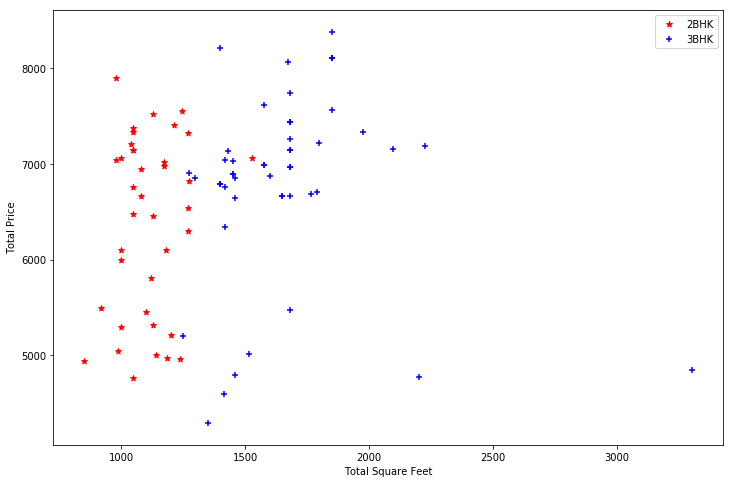

In [170]:
df_J2=df3[(df3['location']=='7th Phase JP Nagar') & (df3['bhk']==2)]
df_J3=df3[(df3['location']=='7th Phase JP Nagar') & (df3['bhk']==3)]
plt.figure(figsize=(12,8))
plt.scatter(y=df_J2['price_per_sqft'],x=df_J2['total_sqft'],c='red',marker='*',label='2BHK')
plt.scatter(y=df_J3['price_per_sqft'],x=df_J3['total_sqft'],c='blue',marker='+',label='3BHK')
plt.xlabel('Total Square Feet')
plt.ylabel('Total Price')
plt.legend()

In [175]:
def plot_location(df,loc):
    df_2BHK=df[(df['location']=='loc') & (df['bhk']==2)]
    df_3BHK=df[(df['location']=='loc') & (df['bhk']==2)]
    plt.figure(figsize=(12,8))
    plt.scatter(y=df_J2['price_per_sqft'],x=df_J2['total_sqft'],c='red',marker='*',label='2BHK')
    plt.scatter(y=df_J3['price_per_sqft'],x=df_J3['total_sqft'],c='blue',marker='+',label='3BHK')
    plt.xlabel('Total Square Feet')
    plt.ylabel('Total Price')
    plt.legend()

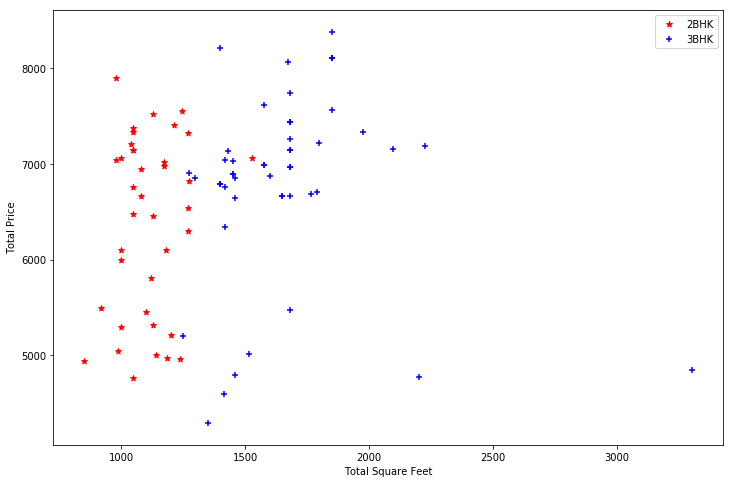

In [176]:
plot_location(df3,'7th Phase JP Nagar')

In the above plot we can see that there are few 3BHK flats whose price is less than that of 2BHK flats for the same location. So we want to delete these kind of rows


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [185]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stat={}
        for bhk,bhk_df in df.groupby('bhk'):
            bhk_stats={
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
            

In [186]:
df4=remove_bhk_outliers(df3)
df4.head()


,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668
4,1st Block Jayanagar,2750.0,4.0,413.0,4.0,15018.181818


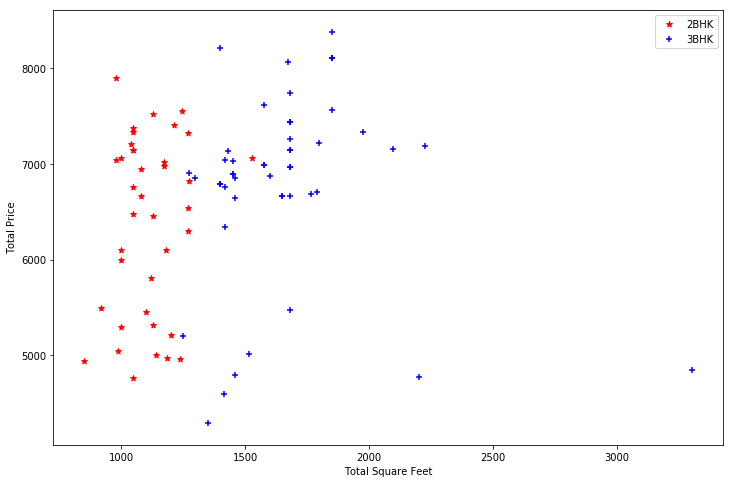

In [187]:
plot_location(df3,'7th Phase JP Nagar')

Now we will remove the outliers from the bath variable.
The general convention is that, the bath can only be bhk+2

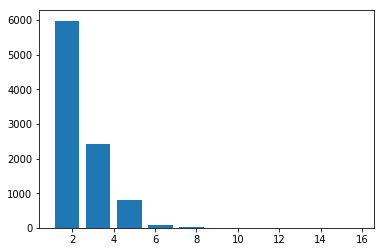

In [191]:
plt.hist(df4['bath'],rwidth=0.8)
plt.show()

In [192]:
df4[df4.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
7805,other,12000.0,12.0,525.0,10.0,4375.000000
7878,other,10000.0,16.0,550.0,16.0,5500.000000
8494,other,6000.0,12.0,150.0,11.0,2500.000000
8787,other,5425.0,13.0,275.0,13.0,5069.124424


In [194]:
df4[df4['bath']>df4['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1438,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
4799,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
6163,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
7740,other,11338.0,9.0,1000.0,6.0,8819.897689


In [195]:
df5=df4[df4['bath']<df4['bhk']+2]
df5.shape

(9224, 6)

In [196]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668
4,1st Block Jayanagar,2750.0,4.0,413.0,4.0,15018.181818


In [197]:
df5.drop('price_per_sqft', axis=1,inplace=True)

C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [198]:
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1235.0,2.0,148.0,2.0
4,1st Block Jayanagar,2750.0,4.0,413.0,4.0


Now we will do one hot encoding for the location variable

In [200]:
df_dummies=pd.get_dummies(df5['location'])
df_dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


since location is a redundant variable and we will drop other variable for the fact of collinearity

In [202]:
df6=pd.concat([df5,df_dummies],axis=1)
df6.drop(columns=['location','other'],inplace=True)

In [203]:
df6.shape

(9224, 256)

No we are ready for model building

In [207]:
X=df6.drop('price',axis=1)
y=df6.price

In [206]:
X.shape

(9224, 255)

In [208]:
y.shape

(9224,)

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [225]:
from sklearn.linear_model import LinearRegression
model_house=LinearRegression()

In [226]:
model_house.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [227]:
model_house.score(X_test,y_test)

0.8430502205368985

In [231]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(model_house, X, y, cv=cv)

array([0.75533175, 0.85630509, 0.67153052, 0.78636081, 0.77897136])

In [233]:
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

Finding the best model using GridSearchCV

In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos={
        'linear regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
            
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best score' : gs.best_score_,
            'best params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best score','best params'])

In [236]:
find_best_model(X,y)

,model,best score,best params
0,linear regression,0.779699,{'normalize': False}
1,lasso,0.635184,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.683308,"{'criterion': 'mse', 'splitter': 'random'}"


In [239]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0] #this is returning the column index

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model_house.predict([x])[0]

In [240]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

93.12028757202631

In [241]:
x = np.zeros(3)
x

array([0., 0., 0.])

We are storing the model in a pickle file with the below command for later use.

In [247]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model_house,f)

We are creating a json file using the below command. JSON is created so that eaiser transfer over the network

In [252]:
import json
columns= {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

## Python FLASK server. It will act as a backend server for our UI

In [253]:
pip install virtualenv

  Stored in directory: C:\Users\vishal.kumar1\AppData\Local\pip\Cache\wheels\6e\e8\db\c73dae4867666e89ba3cfbc4b5c092446f0e584eda6f409cbb
Successfully built distlib
  Found existing installation: zipp 0.3.3
    Uninstalling zipp-0.3.3:
      Successfully uninstalled zipp-0.3.3
  Found existing installation: importlib-metadata 0.0.0
    Uninstalling importlib-metadata-0.0.0:
      Successfully uninstalled importlib-metadata-0.0.0
Note: you may need to restart the kernel to use updated packages.


In [255]:
venv\scripts\activate

SyntaxError: unexpected character after line continuation character (<ipython-input-255-50da32b267b5>, line 1)